<div align="center">

###### Lab 2

# National Tsing Hua University

#### Spring 2025

#### 11320IEEM 513600

#### Deep Learning and Industrial Applications
    
## Lab 2: Predicting Heart Disease with Deep Learning

</div>

### Introduction

In the realm of healthcare, early detection and accurate prediction of diseases play a crucial role in patient care and management. Heart disease remains one of the leading causes of mortality worldwide, making the development of effective diagnostic tools essential. This lab leverages deep learning to predict the presence of heart disease in patients using a subset of 14 key attributes from the Cleveland Heart Disease Database. The objective is to explore and apply deep learning techniques to distinguish between the presence and absence of heart disease based on clinical parameters.

Throughout this lab, you'll engage with the following key activities:
- Use [Pandas](https://pandas.pydata.org) to process the CSV files.
- Use [PyTorch](https://pytorch.org) to build an Artificial Neural Network (ANN) to fit the dataset.
- Evaluate the performance of the trained model to understand its accuracy.

### Attribute Information

1. age: Age of the patient in years
2. sex: (Male/Female)
3. cp: Chest pain type (4 types: low, medium, high, and severe)
4. trestbps: Resting blood pressure
5. chol: Serum cholesterol in mg/dl
6. fbs: Fasting blood sugar > 120 mg/dl
7. restecg: Resting electrocardiographic results (values 0,1,2)
8. thalach: Maximum heart rate achieved
9. exang: Exercise induced angina
10. oldpeak: Oldpeak = ST depression induced by exercise relative to rest
11. slope: The slope of the peak exercise ST segment
12. ca: Number of major vessels (0-3) colored by fluoroscopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversible defect
14. target: target have disease or not (1=yes, 0=no)

### References
- [UCI Heart Disease Data](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data) for the dataset we use in this lab.


## A. Checking and Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# df = pd.read_csv('/content/drive/MyDrive/heart_dataset_train_all.csv')
df = pd.read_csv('heart_dataset_train_all.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,41,Male,medium,105.0,198.0,0,1.0,168.0,0,0.0,2.0,1,2.0,1.0
1,65,Female,low,120.0,177.0,0,1.0,140.0,0,0.4,2.0,0,3.0,1.0
2,44,Female,medium,130.0,219.0,0,0.0,188.0,0,0.0,2.0,0,2.0,1.0
3,54,Female,high,125.0,273.0,0,0.0,152.0,0,0.5,0.0,1,2.0,1.0
4,51,Female,severe,125.0,213.0,0,0.0,125.0,1,1.4,2.0,1,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,40,Female,low,110.0,167.0,0,0.0,114.0,1,2.0,1.0,0,3.0,0.0
269,60,Female,low,117.0,230.0,1,1.0,160.0,1,1.4,2.0,2,3.0,0.0
270,64,Female,high,140.0,335.0,0,1.0,158.0,0,0.0,2.0,0,2.0,0.0
271,43,Female,low,120.0,177.0,0,0.0,120.0,1,2.5,1.0,0,3.0,0.0


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       273 non-null    int64  
 1   sex       272 non-null    object 
 2   cp        272 non-null    object 
 3   trestbps  272 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       273 non-null    int64  
 6   restecg   272 non-null    float64
 7   thalach   272 non-null    float64
 8   exang     273 non-null    int64  
 9   oldpeak   273 non-null    float64
 10  slope     271 non-null    float64
 11  ca        273 non-null    int64  
 12  thal      272 non-null    float64
 13  target    272 non-null    float64
dtypes: float64(8), int64(4), object(2)
memory usage: 30.0+ KB


In [ ]:
# checking for null values
df.isnull().sum()

age         0
sex         1
cp          1
trestbps    1
chol        2
fbs         0
restecg     1
thalach     1
exang       0
oldpeak     0
slope       2
ca          0
thal        1
target      1
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(270, 14)

In [ ]:
# Mapping 'sex' descriptions to numbers
sex_description = {
    'Male': 0,
    'Female': 1,
}
df.loc[:, 'sex'] = df['sex'].map(sex_description)

# Mapping 'cp' (chest pain) descriptions to numbers
pain_description = {
    'low': 0,
    'medium': 1,
    'high': 2,
    'severe': 3
}
df.loc[:, 'cp'] = df['cp'].map(pain_description)

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,41,0,1,105.0,198.0,0,1.0,168.0,0,0.0,2.0,1,2.0,1.0
1,65,1,0,120.0,177.0,0,1.0,140.0,0,0.4,2.0,0,3.0,1.0
2,44,1,1,130.0,219.0,0,0.0,188.0,0,0.0,2.0,0,2.0,1.0
3,54,1,2,125.0,273.0,0,0.0,152.0,0,0.5,0.0,1,2.0,1.0
4,51,1,3,125.0,213.0,0,0.0,125.0,1,1.4,2.0,1,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,40,1,0,110.0,167.0,0,0.0,114.0,1,2.0,1.0,0,3.0,0.0
269,60,1,0,117.0,230.0,1,1.0,160.0,1,1.4,2.0,2,3.0,0.0
270,64,1,2,140.0,335.0,0,1.0,158.0,0,0.0,2.0,0,2.0,0.0
271,43,1,0,120.0,177.0,0,0.0,120.0,1,2.5,1.0,0,3.0,0.0


In [ ]:
df.describe()

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.385185,131.525926,245.607407,0.151852,0.522222,149.807407,0.333333,1.024074,1.400000,0.744444,2.300000,0.544444
std,9.149713,17.904675,51.529411,0.359544,0.529314,23.217253,0.472280,1.188379,0.618188,1.037166,0.623874,0.498946
min,29.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.250000,120.000000,210.250000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,140.000000,274.000000,0.000000,1.000000,167.750000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.062222,-0.103697,0.261782,0.210520,0.109847,-0.124588,-0.412624,0.111263,0.200243,-0.165360,0.254462,0.077368,-0.244798
sex,-0.062222,1.000000,-0.040197,-0.055463,-0.166885,0.042384,-0.069599,-0.058626,0.124054,0.089726,-0.038771,0.140795,0.198493,-0.283776
cp,-0.103697,-0.040197,1.000000,0.035563,-0.063592,0.065869,0.008389,0.300307,-0.428233,-0.183616,0.135174,-0.180598,-0.139765,0.425574
trestbps,0.261782,-0.055463,0.035563,1.000000,0.128444,0.170606,-0.145195,-0.056631,0.067116,0.184896,-0.126553,0.093545,0.068690,-0.173239
chol,0.210520,-0.166885,-0.063592,0.128444,1.000000,0.003430,-0.162687,-0.023753,0.063902,0.084355,-0.031929,0.068647,0.121280,-0.096773
fbs,0.109847,0.042384,0.065869,0.170606,0.003430,1.000000,-0.086165,-0.014297,0.029190,0.007943,-0.056866,0.164266,-0.004972,-0.068845
restecg,-0.124588,-0.069599,0.008389,-0.145195,-0.162687,-0.086165,1.000000,0.025457,-0.089225,-0.047837,0.074982,-0.053946,-0.003377,0.101817
thalach,-0.412624,-0.058626,0.300307,-0.056631,-0.023753,-0.014297,0.025457,1.000000,-0.404349,-0.340564,0.370073,-0.205060,-0.078637,0.432687
exang,0.111263,0.124054,-0.428233,0.067116,0.063902,0.029190,-0.089225,-0.404349,1.000000,0.294308,-0.280124,0.106250,0.189253,-0.457502
oldpeak,0.200243,0.089726,-0.183616,0.184896,0.084355,0.007943,-0.047837,-0.340564,0.294308,1.000000,-0.585472,0.223375,0.200315,-0.443504


In [ ]:
# 移除低相關的特徵
df = df.drop(columns=["chol", "fbs", "restecg", "trestbps"])

#### Converting the DataFrame to a NumPy Array

In [ ]:
import numpy as np

np_data = df.values
np_data.shape

(270, 10)

In [ ]:
split_point = int(np_data.shape[0]*0.7)

np.random.shuffle(np_data)

x_train = np_data[:split_point, :9]
y_train = np_data[:split_point, 9]
x_val = np_data[split_point:, :9]
y_val = np_data[split_point:, 9]

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Convert to PyTorch tensors
x_train = np.array(x_train, dtype=float)
x_train = torch.from_numpy(x_train).float()
y_train = np.array(y_train, dtype=int)
y_train = torch.from_numpy(y_train).long()

x_val = np.array(x_val, dtype=float)
x_val = torch.from_numpy(x_val).float()
y_val = np.array(y_val, dtype=int)
y_val = torch.from_numpy(y_val).long()

batch_size = 64

# Create datasets
train_dataset = TensorDataset(x_train, y_train)
val_dataset = TensorDataset(x_val, y_val)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

print(f'Number of samples in train and validation are {len(train_loader.dataset)} and {len(val_loader.dataset)}.')

Number of samples in train and validation are 189 and 81.


In [ ]:
!pip install tqdm

## B. Defining Neural Networks

In PyTorch, we can use **class** to define our custom neural network architectures by subclassing the `nn.Module` class. This gives our neural network all the functionality it needs to work with PyTorch's other utilities and keeps our implementation organized.

- Neural networks are defined by subclassing `nn.Module`.
- The layers of the neural network are initialized in the `__init__` method.
- The forward pass operations on input data are defined in the `forward` method.

It's worth noting that while we only define the forward pass, PyTorch will automatically derive the backward pass for us, which is used during training to update the model's weights."

In [ ]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(9, 256),
            #nn.BatchNorm1d(256),
            nn.ReLU(),
            #nn.Dropout(0.3),
            nn.Linear(256, 256),
            #nn.BatchNorm1d(256),
            nn.ReLU(),
            #nn.Dropout(0.3),
            nn.Linear(256, 2)
        ).cuda()

    def forward(self, x):
        return self.model(x)

In [ ]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(9, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 16),
            nn.ReLU(),
            nn.Linear(16, 2)
        ).cuda()

    def forward(self, x):
        return self.model(x)

In [ ]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(9, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 16),
            nn.BatchNorm1d(16),
            nn.ReLU(),
            nn.Linear(16, 2)
        ).cuda()

    def forward(self, x):
        return self.model(x)

## C. Training the Neural Network

In [ ]:
# Check your GPU status.
!nvidia-smi

Wed Mar 26 10:26:03 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.03                 Driver Version: 566.03         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1650      WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   49C    P0             15W /   50W |       0MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR
from tqdm.auto import tqdm
import random

# 設定隨機種子
seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
random.seed(seed)
np.random.seed(seed)

# 記錄訓練過程
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# 訓練超參數
epochs = 300
patience = 500 # **Early Stopping 的耐心值**
counter = 0  # 追蹤多少個 epoch 沒有改善

model = Model().cuda()  # **記得把模型搬到 GPU**
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001,weight_decay=1e-2)
lr_scheduler = CosineAnnealingLR(optimizer, T_max=epochs, eta_min=0)

best_val_loss = float('inf')
best_val_acc = -1

for epoch in tqdm(range(epochs)):
    # Training
    model.train()
    total_loss = 0.0
    train_correct = 0
    total_train_samples = 0

    for features, labels in train_loader:
        features, labels = features.cuda(), labels.cuda()  # **確保資料在 GPU**

        outputs = model(features)
        loss = criterion(outputs, labels)
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_predicted = outputs.argmax(-1)
        train_correct += (train_predicted == labels).sum().item()
        total_train_samples += labels.size(0)

    # 更新學習率
    lr_scheduler.step()

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = 100. * train_correct / total_train_samples

    # Validation
    model.eval()
    total_val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for features, labels in val_loader:
            features, labels = features.cuda(), labels.cuda()

            outputs = model(features)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

            predicted = outputs.argmax(-1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    avg_val_loss = total_val_loss / len(val_loader)
    val_accuracy = 100. * correct / total

    # **Early Stopping**
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        counter = 0  # **重置耐心計數**
    else:
        counter += 1  # **若沒有改善，計數+1**
        if counter >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            break  # **提早結束訓練**

    # **儲存最佳模型**
    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy
        torch.save(model.state_dict(), 'model_classification.pth')

    print(f'Epoch {epoch+1}/{epochs}, Train loss: {avg_train_loss:.4f}, Train acc: {train_accuracy:.4f}%, Val loss: {avg_val_loss:.4f}, Val acc: {val_accuracy:.4f}%, Best Val loss: {best_val_loss:.4f}, Best Val acc: {best_val_acc:.2f}%')

    # **記錄結果**
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)


  2%|█▋                                                                                | 6/300 [00:00<00:05, 53.71it/s]

Epoch 1/300, Train loss: 6.6072, Train acc: 49.2063%, Val loss: 1.9124, Val acc: 41.9753%, Best Val loss: 1.9124, Best Val acc: 41.98%
Epoch 2/300, Train loss: 4.2031, Train acc: 52.9101%, Val loss: 6.4111, Val acc: 58.0247%, Best Val loss: 1.9124, Best Val acc: 58.02%
Epoch 3/300, Train loss: 5.4913, Train acc: 52.9101%, Val loss: 0.6557, Val acc: 59.2593%, Best Val loss: 0.6557, Best Val acc: 59.26%
Epoch 4/300, Train loss: 2.6583, Train acc: 50.2646%, Val loss: 4.1526, Val acc: 41.9753%, Best Val loss: 0.6557, Best Val acc: 59.26%
Epoch 5/300, Train loss: 2.3021, Train acc: 56.0847%, Val loss: 1.4490, Val acc: 58.0247%, Best Val loss: 0.6557, Best Val acc: 59.26%
Epoch 6/300, Train loss: 2.1606, Train acc: 53.4392%, Val loss: 1.5608, Val acc: 58.0247%, Best Val loss: 0.6557, Best Val acc: 59.26%
Epoch 7/300, Train loss: 1.2586, Train acc: 54.4974%, Val loss: 1.5661, Val acc: 41.9753%, Best Val loss: 0.6557, Best Val acc: 59.26%
Epoch 8/300, Train loss: 1.2910, Train acc: 50.2646%, V

 12%|█████████▍                                                                       | 35/300 [00:00<00:02, 90.11it/s]

Epoch 14/300, Train loss: 0.7636, Train acc: 65.0794%, Val loss: 0.6087, Val acc: 72.8395%, Best Val loss: 0.6087, Best Val acc: 72.84%
Epoch 15/300, Train loss: 0.7118, Train acc: 63.4921%, Val loss: 0.5273, Val acc: 70.3704%, Best Val loss: 0.5273, Best Val acc: 72.84%
Epoch 16/300, Train loss: 0.6984, Train acc: 66.6667%, Val loss: 0.5748, Val acc: 65.4321%, Best Val loss: 0.5273, Best Val acc: 72.84%
Epoch 17/300, Train loss: 0.6282, Train acc: 70.3704%, Val loss: 0.5975, Val acc: 70.3704%, Best Val loss: 0.5273, Best Val acc: 72.84%
Epoch 18/300, Train loss: 0.5737, Train acc: 70.8995%, Val loss: 0.6299, Val acc: 62.9630%, Best Val loss: 0.5273, Best Val acc: 72.84%
Epoch 19/300, Train loss: 0.6047, Train acc: 69.3122%, Val loss: 0.5290, Val acc: 74.0741%, Best Val loss: 0.5273, Best Val acc: 74.07%
Epoch 20/300, Train loss: 0.5813, Train acc: 66.6667%, Val loss: 0.5026, Val acc: 74.0741%, Best Val loss: 0.5026, Best Val acc: 74.07%
Epoch 21/300, Train loss: 0.5426, Train acc: 76.

 15%|████████████▍                                                                    | 46/300 [00:00<00:02, 94.77it/s]

Epoch 36/300, Train loss: 0.4629, Train acc: 80.4233%, Val loss: 0.4682, Val acc: 79.0123%, Best Val loss: 0.4682, Best Val acc: 80.25%
Epoch 37/300, Train loss: 0.4617, Train acc: 78.8360%, Val loss: 0.4787, Val acc: 75.3086%, Best Val loss: 0.4682, Best Val acc: 80.25%
Epoch 38/300, Train loss: 0.4799, Train acc: 77.7778%, Val loss: 0.4706, Val acc: 75.3086%, Best Val loss: 0.4682, Best Val acc: 80.25%
Epoch 39/300, Train loss: 0.4453, Train acc: 82.5397%, Val loss: 0.4896, Val acc: 74.0741%, Best Val loss: 0.4682, Best Val acc: 80.25%
Epoch 40/300, Train loss: 0.4788, Train acc: 78.8360%, Val loss: 0.4646, Val acc: 79.0123%, Best Val loss: 0.4646, Best Val acc: 80.25%
Epoch 41/300, Train loss: 0.4432, Train acc: 80.9524%, Val loss: 0.4696, Val acc: 79.0123%, Best Val loss: 0.4646, Best Val acc: 80.25%
Epoch 42/300, Train loss: 0.4395, Train acc: 81.4815%, Val loss: 0.4581, Val acc: 77.7778%, Best Val loss: 0.4581, Best Val acc: 80.25%
Epoch 43/300, Train loss: 0.4423, Train acc: 79.

 23%|██████████████████▎                                                              | 68/300 [00:00<00:02, 99.22it/s]

Epoch 55/300, Train loss: 0.4721, Train acc: 78.3069%, Val loss: 0.5280, Val acc: 70.3704%, Best Val loss: 0.4428, Best Val acc: 80.25%
Epoch 56/300, Train loss: 0.4371, Train acc: 77.7778%, Val loss: 0.4410, Val acc: 79.0123%, Best Val loss: 0.4410, Best Val acc: 80.25%
Epoch 57/300, Train loss: 0.4217, Train acc: 82.0106%, Val loss: 0.4398, Val acc: 79.0123%, Best Val loss: 0.4398, Best Val acc: 80.25%
Epoch 58/300, Train loss: 0.4417, Train acc: 81.4815%, Val loss: 0.5349, Val acc: 70.3704%, Best Val loss: 0.4398, Best Val acc: 80.25%
Epoch 59/300, Train loss: 0.4260, Train acc: 82.0106%, Val loss: 0.4408, Val acc: 79.0123%, Best Val loss: 0.4398, Best Val acc: 80.25%
Epoch 60/300, Train loss: 0.3854, Train acc: 83.5979%, Val loss: 0.4654, Val acc: 79.0123%, Best Val loss: 0.4398, Best Val acc: 80.25%
Epoch 61/300, Train loss: 0.3890, Train acc: 84.6561%, Val loss: 0.4441, Val acc: 79.0123%, Best Val loss: 0.4398, Best Val acc: 80.25%
Epoch 62/300, Train loss: 0.4059, Train acc: 83.

 31%|████████████████████████▊                                                       | 93/300 [00:00<00:01, 108.44it/s]

Epoch 80/300, Train loss: 0.3761, Train acc: 84.1270%, Val loss: 0.4374, Val acc: 79.0123%, Best Val loss: 0.4355, Best Val acc: 81.48%
Epoch 81/300, Train loss: 0.3791, Train acc: 84.6561%, Val loss: 0.4446, Val acc: 81.4815%, Best Val loss: 0.4355, Best Val acc: 81.48%
Epoch 82/300, Train loss: 0.3776, Train acc: 84.6561%, Val loss: 0.4961, Val acc: 77.7778%, Best Val loss: 0.4355, Best Val acc: 81.48%
Epoch 83/300, Train loss: 0.3810, Train acc: 84.6561%, Val loss: 0.4397, Val acc: 80.2469%, Best Val loss: 0.4355, Best Val acc: 81.48%
Epoch 84/300, Train loss: 0.3666, Train acc: 88.8889%, Val loss: 0.4619, Val acc: 81.4815%, Best Val loss: 0.4355, Best Val acc: 81.48%
Epoch 85/300, Train loss: 0.3752, Train acc: 84.1270%, Val loss: 0.4657, Val acc: 81.4815%, Best Val loss: 0.4355, Best Val acc: 81.48%
Epoch 86/300, Train loss: 0.3621, Train acc: 87.8307%, Val loss: 0.4556, Val acc: 80.2469%, Best Val loss: 0.4355, Best Val acc: 81.48%
Epoch 87/300, Train loss: 0.3741, Train acc: 85.

 39%|██████████████████████████████▌                                                | 116/300 [00:01<00:01, 107.23it/s]

Epoch 102/300, Train loss: 0.3938, Train acc: 81.4815%, Val loss: 0.5035, Val acc: 79.0123%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 103/300, Train loss: 0.3824, Train acc: 85.7143%, Val loss: 0.4364, Val acc: 79.0123%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 104/300, Train loss: 0.3733, Train acc: 83.5979%, Val loss: 0.5548, Val acc: 76.5432%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 105/300, Train loss: 0.3943, Train acc: 84.6561%, Val loss: 0.4408, Val acc: 77.7778%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 106/300, Train loss: 0.3745, Train acc: 85.1852%, Val loss: 0.4954, Val acc: 77.7778%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 107/300, Train loss: 0.3631, Train acc: 86.7725%, Val loss: 0.4656, Val acc: 79.0123%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 108/300, Train loss: 0.3608, Train acc: 85.1852%, Val loss: 0.4386, Val acc: 80.2469%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 109/300, Train loss: 0.3677, Train 

 46%|████████████████████████████████████▌                                          | 139/300 [00:01<00:01, 106.70it/s]

Epoch 127/300, Train loss: 0.3562, Train acc: 85.7143%, Val loss: 0.4914, Val acc: 76.5432%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 128/300, Train loss: 0.3496, Train acc: 86.7725%, Val loss: 0.4405, Val acc: 80.2469%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 129/300, Train loss: 0.3873, Train acc: 83.0688%, Val loss: 0.5274, Val acc: 77.7778%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 130/300, Train loss: 0.4098, Train acc: 84.1270%, Val loss: 0.4423, Val acc: 79.0123%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 131/300, Train loss: 0.3920, Train acc: 83.0688%, Val loss: 0.4744, Val acc: 79.0123%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 132/300, Train loss: 0.3653, Train acc: 85.1852%, Val loss: 0.4424, Val acc: 79.0123%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 133/300, Train loss: 0.3953, Train acc: 84.1270%, Val loss: 0.5332, Val acc: 77.7778%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 134/300, Train loss: 0.3881, Train 

 54%|██████████████████████████████████████████▉                                    | 163/300 [00:01<00:01, 110.34it/s]

Epoch 151/300, Train loss: 0.3541, Train acc: 86.2434%, Val loss: 0.4676, Val acc: 80.2469%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 152/300, Train loss: 0.3375, Train acc: 88.3598%, Val loss: 0.5099, Val acc: 79.0123%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 153/300, Train loss: 0.3370, Train acc: 87.8307%, Val loss: 0.4461, Val acc: 79.0123%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 154/300, Train loss: 0.3598, Train acc: 85.7143%, Val loss: 0.5111, Val acc: 77.7778%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 155/300, Train loss: 0.3595, Train acc: 87.3016%, Val loss: 0.4587, Val acc: 80.2469%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 156/300, Train loss: 0.3427, Train acc: 87.8307%, Val loss: 0.4694, Val acc: 80.2469%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 157/300, Train loss: 0.3427, Train acc: 87.8307%, Val loss: 0.4855, Val acc: 77.7778%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 158/300, Train loss: 0.3371, Train 

 62%|█████████████████████████████████████████████████▏                             | 187/300 [00:01<00:01, 110.56it/s]

Epoch 175/300, Train loss: 0.3368, Train acc: 87.8307%, Val loss: 0.4690, Val acc: 80.2469%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 176/300, Train loss: 0.3392, Train acc: 87.3016%, Val loss: 0.4644, Val acc: 80.2469%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 177/300, Train loss: 0.3413, Train acc: 87.8307%, Val loss: 0.4854, Val acc: 77.7778%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 178/300, Train loss: 0.3377, Train acc: 88.3598%, Val loss: 0.4590, Val acc: 80.2469%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 179/300, Train loss: 0.3392, Train acc: 87.3016%, Val loss: 0.5014, Val acc: 76.5432%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 180/300, Train loss: 0.3525, Train acc: 87.8307%, Val loss: 0.4622, Val acc: 80.2469%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 181/300, Train loss: 0.3372, Train acc: 87.8307%, Val loss: 0.4541, Val acc: 81.4815%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 182/300, Train loss: 0.3396, Train 

 70%|███████████████████████████████████████████████████████▌                       | 211/300 [00:02<00:00, 106.91it/s]

Epoch 199/300, Train loss: 0.3954, Train acc: 84.6561%, Val loss: 0.4440, Val acc: 79.0123%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 200/300, Train loss: 0.3419, Train acc: 86.7725%, Val loss: 0.5600, Val acc: 76.5432%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 201/300, Train loss: 0.3611, Train acc: 86.7725%, Val loss: 0.4650, Val acc: 80.2469%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 202/300, Train loss: 0.3484, Train acc: 84.6561%, Val loss: 0.4470, Val acc: 79.0123%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 203/300, Train loss: 0.3481, Train acc: 85.1852%, Val loss: 0.5263, Val acc: 77.7778%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 204/300, Train loss: 0.3560, Train acc: 86.7725%, Val loss: 0.4551, Val acc: 80.2469%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 205/300, Train loss: 0.3374, Train acc: 88.3598%, Val loss: 0.4722, Val acc: 80.2469%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 206/300, Train loss: 0.3333, Train 

 78%|█████████████████████████████████████████████████████████████▎                 | 233/300 [00:02<00:00, 104.79it/s]

Epoch 220/300, Train loss: 0.3334, Train acc: 87.8307%, Val loss: 0.4776, Val acc: 79.0123%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 221/300, Train loss: 0.3327, Train acc: 88.8889%, Val loss: 0.4942, Val acc: 77.7778%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 222/300, Train loss: 0.3360, Train acc: 88.3598%, Val loss: 0.4745, Val acc: 80.2469%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 223/300, Train loss: 0.3409, Train acc: 88.3598%, Val loss: 0.4575, Val acc: 81.4815%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 224/300, Train loss: 0.3355, Train acc: 88.3598%, Val loss: 0.4902, Val acc: 77.7778%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 225/300, Train loss: 0.3386, Train acc: 88.3598%, Val loss: 0.4933, Val acc: 77.7778%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 226/300, Train loss: 0.3425, Train acc: 86.7725%, Val loss: 0.4571, Val acc: 81.4815%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 227/300, Train loss: 0.3363, Train 

 85%|███████████████████████████████████████████████████████████████████▍           | 256/300 [00:02<00:00, 103.85it/s]

Epoch 241/300, Train loss: 0.3384, Train acc: 87.8307%, Val loss: 0.5043, Val acc: 76.5432%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 242/300, Train loss: 0.3390, Train acc: 87.8307%, Val loss: 0.4859, Val acc: 77.7778%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 243/300, Train loss: 0.3354, Train acc: 87.3016%, Val loss: 0.4598, Val acc: 80.2469%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 244/300, Train loss: 0.3356, Train acc: 87.3016%, Val loss: 0.4699, Val acc: 80.2469%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 245/300, Train loss: 0.3340, Train acc: 87.8307%, Val loss: 0.4773, Val acc: 79.0123%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 246/300, Train loss: 0.3312, Train acc: 88.3598%, Val loss: 0.4858, Val acc: 77.7778%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 247/300, Train loss: 0.3327, Train acc: 87.8307%, Val loss: 0.4762, Val acc: 80.2469%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 248/300, Train loss: 0.3315, Train 

 93%|██████████████████████████████████████████████████████████████████████████▏     | 278/300 [00:02<00:00, 98.83it/s]

Epoch 263/300, Train loss: 0.3327, Train acc: 88.3598%, Val loss: 0.4835, Val acc: 79.0123%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 264/300, Train loss: 0.3329, Train acc: 88.3598%, Val loss: 0.4829, Val acc: 79.0123%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 265/300, Train loss: 0.3315, Train acc: 88.3598%, Val loss: 0.4802, Val acc: 79.0123%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 266/300, Train loss: 0.3330, Train acc: 87.8307%, Val loss: 0.4729, Val acc: 80.2469%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 267/300, Train loss: 0.3307, Train acc: 87.8307%, Val loss: 0.4724, Val acc: 80.2469%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 268/300, Train loss: 0.3339, Train acc: 87.8307%, Val loss: 0.4711, Val acc: 80.2469%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 269/300, Train loss: 0.3322, Train acc: 87.8307%, Val loss: 0.4755, Val acc: 80.2469%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 270/300, Train loss: 0.3325, Train 

100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:02<00:00, 101.84it/s]

Epoch 284/300, Train loss: 0.3334, Train acc: 87.8307%, Val loss: 0.4774, Val acc: 79.0123%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 285/300, Train loss: 0.3323, Train acc: 87.8307%, Val loss: 0.4774, Val acc: 79.0123%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 286/300, Train loss: 0.3344, Train acc: 87.8307%, Val loss: 0.4772, Val acc: 79.0123%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 287/300, Train loss: 0.3323, Train acc: 87.8307%, Val loss: 0.4776, Val acc: 79.0123%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 288/300, Train loss: 0.3302, Train acc: 87.8307%, Val loss: 0.4772, Val acc: 79.0123%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 289/300, Train loss: 0.3309, Train acc: 87.8307%, Val loss: 0.4768, Val acc: 79.0123%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 290/300, Train loss: 0.3322, Train acc: 87.8307%, Val loss: 0.4766, Val acc: 79.0123%, Best Val loss: 0.4355, Best Val acc: 82.72%
Epoch 291/300, Train loss: 0.3307, Train 

In [ ]:
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR
from tqdm.auto import tqdm
import random

# 設定隨機種子
seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
random.seed(seed)
np.random.seed(seed)

# 記錄訓練過程
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# 訓練超參數
epochs = 150
patience = 20  # **Early Stopping 的耐心值**
counter = 0  # 追蹤多少個 epoch 沒有改善

model = Model().cuda()  # **記得把模型搬到 GPU**
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)  # Label Smoothing
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-3)
lr_scheduler = CosineAnnealingLR(optimizer, T_max=epochs, eta_min=0)

best_val_loss = float('inf')
best_val_acc = -1

for epoch in tqdm(range(epochs)):
    # Training
    model.train()
    total_loss = 0.0
    train_correct = 0
    total_train_samples = 0

    for features, labels in train_loader:
        features, labels = features.cuda(), labels.cuda()  # **確保資料在 GPU**

        outputs = model(features)
        loss = criterion(outputs, labels)
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_predicted = outputs.argmax(-1)
        train_correct += (train_predicted == labels).sum().item()
        total_train_samples += labels.size(0)

    # 更新學習率
    lr_scheduler.step()

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = 100. * train_correct / total_train_samples

    # Validation
    model.eval()
    total_val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for features, labels in val_loader:
            features, labels = features.cuda(), labels.cuda()

            outputs = model(features)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

            predicted = outputs.argmax(-1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    avg_val_loss = total_val_loss / len(val_loader)
    val_accuracy = 100. * correct / total

    # **Early Stopping**
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        counter = 0  # **重置耐心計數**
    else:
        counter += 1  # **若沒有改善，計數+1**
        if counter >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            break  # **提早結束訓練**

    # **儲存最佳模型**
    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy
        torch.save(model.state_dict(), 'model_classification.pth')

    print(f'Epoch {epoch+1}/{epochs}, Train loss: {avg_train_loss:.4f}, Train acc: {train_accuracy:.4f}%, Val loss: {avg_val_loss:.4f}, Val acc: {val_accuracy:.4f}%, Best Val loss: {best_val_loss:.4f}, Best Val acc: {best_val_acc:.2f}%')

    # **記錄結果**
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

  2%|█▋                                                                                | 3/150 [00:00<00:06, 22.78it/s]

Epoch 1/150, Train loss: 0.6365, Train acc: 65.0794%, Val loss: 0.6844, Val acc: 51.8519%, Best Val loss: 0.6844, Best Val acc: 51.85%
Epoch 2/150, Train loss: 0.5910, Train acc: 74.0741%, Val loss: 0.6631, Val acc: 66.6667%, Best Val loss: 0.6631, Best Val acc: 66.67%
Epoch 3/150, Train loss: 0.5708, Train acc: 73.5450%, Val loss: 0.6353, Val acc: 69.1358%, Best Val loss: 0.6353, Best Val acc: 69.14%
Epoch 4/150, Train loss: 0.5554, Train acc: 75.1323%, Val loss: 0.6096, Val acc: 66.6667%, Best Val loss: 0.6096, Best Val acc: 69.14%
Epoch 5/150, Train loss: 0.5365, Train acc: 78.3069%, Val loss: 0.5917, Val acc: 71.6049%, Best Val loss: 0.5917, Best Val acc: 71.60%
Epoch 6/150, Train loss: 0.5065, Train acc: 79.8942%, Val loss: 0.5889, Val acc: 70.3704%, Best Val loss: 0.5889, Best Val acc: 71.60%


  9%|███████                                                                          | 13/150 [00:00<00:04, 30.10it/s]

Epoch 7/150, Train loss: 0.5009, Train acc: 82.5397%, Val loss: 0.5748, Val acc: 74.0741%, Best Val loss: 0.5748, Best Val acc: 74.07%
Epoch 8/150, Train loss: 0.4767, Train acc: 84.1270%, Val loss: 0.5527, Val acc: 75.3086%, Best Val loss: 0.5527, Best Val acc: 75.31%
Epoch 9/150, Train loss: 0.4764, Train acc: 80.4233%, Val loss: 0.5493, Val acc: 74.0741%, Best Val loss: 0.5493, Best Val acc: 75.31%
Epoch 10/150, Train loss: 0.4562, Train acc: 84.6561%, Val loss: 0.5328, Val acc: 76.5432%, Best Val loss: 0.5328, Best Val acc: 76.54%
Epoch 11/150, Train loss: 0.4468, Train acc: 87.8307%, Val loss: 0.5244, Val acc: 75.3086%, Best Val loss: 0.5244, Best Val acc: 76.54%
Epoch 12/150, Train loss: 0.4452, Train acc: 86.7725%, Val loss: 0.5466, Val acc: 76.5432%, Best Val loss: 0.5244, Best Val acc: 76.54%
Epoch 13/150, Train loss: 0.4201, Train acc: 88.3598%, Val loss: 0.5442, Val acc: 77.7778%, Best Val loss: 0.5244, Best Val acc: 77.78%


 14%|███████████▎                                                                     | 21/150 [00:00<00:03, 33.60it/s]

Epoch 14/150, Train loss: 0.4040, Train acc: 89.4180%, Val loss: 0.5335, Val acc: 75.3086%, Best Val loss: 0.5244, Best Val acc: 77.78%
Epoch 15/150, Train loss: 0.4240, Train acc: 86.7725%, Val loss: 0.5211, Val acc: 76.5432%, Best Val loss: 0.5211, Best Val acc: 77.78%
Epoch 16/150, Train loss: 0.4139, Train acc: 85.7143%, Val loss: 0.5101, Val acc: 79.0123%, Best Val loss: 0.5101, Best Val acc: 79.01%
Epoch 17/150, Train loss: 0.4074, Train acc: 88.8889%, Val loss: 0.5530, Val acc: 74.0741%, Best Val loss: 0.5101, Best Val acc: 79.01%
Epoch 18/150, Train loss: 0.3932, Train acc: 91.5344%, Val loss: 0.5575, Val acc: 74.0741%, Best Val loss: 0.5101, Best Val acc: 79.01%
Epoch 19/150, Train loss: 0.3878, Train acc: 90.4762%, Val loss: 0.5307, Val acc: 82.7160%, Best Val loss: 0.5101, Best Val acc: 82.72%
Epoch 20/150, Train loss: 0.3865, Train acc: 88.3598%, Val loss: 0.5414, Val acc: 76.5432%, Best Val loss: 0.5101, Best Val acc: 82.72%
Epoch 21/150, Train loss: 0.3979, Train acc: 87.

 19%|███████████████▋                                                                 | 29/150 [00:00<00:03, 35.65it/s]

Epoch 22/150, Train loss: 0.3803, Train acc: 89.4180%, Val loss: 0.6273, Val acc: 71.6049%, Best Val loss: 0.5101, Best Val acc: 82.72%
Epoch 23/150, Train loss: 0.3745, Train acc: 90.4762%, Val loss: 0.6815, Val acc: 72.8395%, Best Val loss: 0.5101, Best Val acc: 82.72%
Epoch 24/150, Train loss: 0.3759, Train acc: 88.8889%, Val loss: 0.5462, Val acc: 80.2469%, Best Val loss: 0.5101, Best Val acc: 82.72%
Epoch 25/150, Train loss: 0.3460, Train acc: 90.4762%, Val loss: 0.5068, Val acc: 81.4815%, Best Val loss: 0.5068, Best Val acc: 82.72%
Epoch 26/150, Train loss: 0.3631, Train acc: 92.0635%, Val loss: 0.6326, Val acc: 71.6049%, Best Val loss: 0.5068, Best Val acc: 82.72%
Epoch 27/150, Train loss: 0.3633, Train acc: 92.0635%, Val loss: 0.6141, Val acc: 75.3086%, Best Val loss: 0.5068, Best Val acc: 82.72%
Epoch 28/150, Train loss: 0.3458, Train acc: 93.1217%, Val loss: 0.5403, Val acc: 80.2469%, Best Val loss: 0.5068, Best Val acc: 82.72%
Epoch 29/150, Train loss: 0.3391, Train acc: 92.

 25%|███████████████████▉                                                             | 37/150 [00:01<00:03, 37.33it/s]

Epoch 31/150, Train loss: 0.3487, Train acc: 92.5926%, Val loss: 0.6029, Val acc: 76.5432%, Best Val loss: 0.5068, Best Val acc: 82.72%
Epoch 32/150, Train loss: 0.3339, Train acc: 93.1217%, Val loss: 0.5887, Val acc: 75.3086%, Best Val loss: 0.5068, Best Val acc: 82.72%
Epoch 33/150, Train loss: 0.3600, Train acc: 89.9471%, Val loss: 0.6353, Val acc: 70.3704%, Best Val loss: 0.5068, Best Val acc: 82.72%
Epoch 34/150, Train loss: 0.3416, Train acc: 93.6508%, Val loss: 0.5768, Val acc: 75.3086%, Best Val loss: 0.5068, Best Val acc: 82.72%
Epoch 35/150, Train loss: 0.3232, Train acc: 92.5926%, Val loss: 0.6462, Val acc: 74.0741%, Best Val loss: 0.5068, Best Val acc: 82.72%
Epoch 36/150, Train loss: 0.3310, Train acc: 91.5344%, Val loss: 0.5943, Val acc: 77.7778%, Best Val loss: 0.5068, Best Val acc: 82.72%
Epoch 37/150, Train loss: 0.3326, Train acc: 90.4762%, Val loss: 0.5922, Val acc: 79.0123%, Best Val loss: 0.5068, Best Val acc: 82.72%
Epoch 38/150, Train loss: 0.3446, Train acc: 92.

 29%|███████████████████████▊                                                         | 44/150 [00:01<00:03, 33.05it/s]

Epoch 39/150, Train loss: 0.3278, Train acc: 92.0635%, Val loss: 0.6534, Val acc: 76.5432%, Best Val loss: 0.5068, Best Val acc: 82.72%
Epoch 40/150, Train loss: 0.3230, Train acc: 91.5344%, Val loss: 0.7013, Val acc: 74.0741%, Best Val loss: 0.5068, Best Val acc: 82.72%
Epoch 41/150, Train loss: 0.3105, Train acc: 95.2381%, Val loss: 0.6276, Val acc: 75.3086%, Best Val loss: 0.5068, Best Val acc: 82.72%
Epoch 42/150, Train loss: 0.3248, Train acc: 93.1217%, Val loss: 0.6051, Val acc: 76.5432%, Best Val loss: 0.5068, Best Val acc: 82.72%
Epoch 43/150, Train loss: 0.3131, Train acc: 93.1217%, Val loss: 0.7012, Val acc: 74.0741%, Best Val loss: 0.5068, Best Val acc: 82.72%
Epoch 44/150, Train loss: 0.3371, Train acc: 91.0053%, Val loss: 0.6731, Val acc: 76.5432%, Best Val loss: 0.5068, Best Val acc: 82.72%
Early stopping triggered at epoch 45


#### Visualizing the model performance

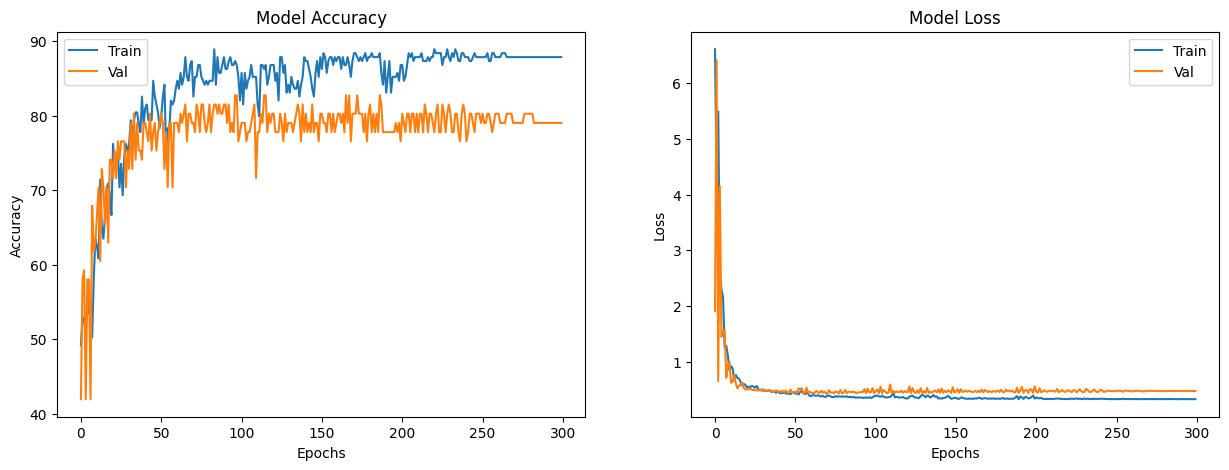

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plotting training and validation accuracy
ax[0].plot(train_accuracies)
ax[0].plot(val_accuracies)
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train', 'Val'])

# Plotting training and validation loss
ax[1].plot(train_losses)
ax[1].plot(val_losses)
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train', 'Val'])

plt.show()

## D. Evaluating Your Trained Model

In [ ]:
# read test file
#test_data = pd.read_csv('/content/drive/MyDrive/heart_dataset_test.csv')
test_data = pd.read_csv('heart_dataset_test.csv')
test_data.head()
test_data = test_data.drop(columns=["chol", "fbs", "restecg", "trestbps"])

In [ ]:
test_data.isnull().sum()

age        0
sex        0
cp         0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
target     0
dtype: int64

In [ ]:
test_data = test_data.values
test_data.shape

(31, 10)

In [ ]:
# Convert to PyTorch tensors
x_test = torch.from_numpy(test_data[:, :9]).float()
y_test = torch.from_numpy(test_data[:, 9]).long()

# Create datasets
test_dataset = TensorDataset(x_test, y_test)

# Create dataloaders
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [ ]:
# Load the trained weights
model.load_state_dict(torch.load('model_classification.pth'))

# Set the model to evaluation mode
model.eval()

test_correct = 0
test_total = 0

with torch.no_grad():
    for features, labels in test_loader:

        features = features.cuda()
        labels = labels.cuda()

        outputs = model(features)

        predicted = outputs.argmax(-1)
        test_correct += (predicted == labels).sum().item()
        test_total += labels.size(0)

print(f'Test accuracy is {100. * test_correct / test_total}%')

Test accuracy is 87.09677419354838%


C:\Users\user\AppData\Local\Temp\ipykernel_17324\1852124976.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model_classification.pth'))

In [ ]:
# Load the trained weights
model.load_state_dict(torch.load('model_classification.pth'))

# Set the model to evaluation mode
model.eval()

test_correct = 0
test_total = 0

with torch.no_grad():
    for features, labels in test_loader:

        features = features.cuda()
        labels = labels.cuda()

        outputs = model(features)

        predicted = outputs.argmax(-1)
        test_correct += (predicted == labels).sum().item()
        test_total += labels.size(0)

print(f'Test accuracy is {100. * test_correct / test_total}%')

Test accuracy is 87.09677419354838%


C:\Users\user\AppData\Local\Temp\ipykernel_9552\1852124976.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model_classification.pth'))


In [1]:
import nbformat
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Define the path to the original notebook
notebook_path = '/content/drive/MyDrive/PhD/113 DLIA/HW2/lab2.ipynb'

# Define the path for the cleaned output notebook
cleaned_path = '/content/drive/MyDrive/PhD/113 DLIA/HW/lab3_clean.ipynb'

# Load the notebook from the specified path
with open(notebook_path, 'r', encoding='utf-8') as f:
    nb = nbformat.read(f, as_version=4)

# Remove widget metadata to prevent GitHub rendering issues
if 'widgets' in nb['metadata']:
    del nb['metadata']['widgets']

# Save the cleaned notebook to the specified path
with open(cleaned_path, 'w', encoding='utf-8') as f:
    nbformat.write(nb, f)